In [ ]:
install.packages(c("forecast", "ggplot2", "dplyr", "tseries","lubridate"))


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘urca’, ‘zoo’, ‘RcppArmadillo’, ‘quadprog’, ‘quantmod’




##Load the dataset

In [ ]:
# Load necessary libraries
library(readr)
library(dplyr)
library(ggplot2)
library(zoo)

# Read the dataset
data <- read.csv("COST_stock_data.csv")

head(data)

str(data)

summary(data)


,Date,open,high,low,close,adjclose,volume,ticker
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,04-01-2021,377.43,381.55,374.81,380.15,362.5612,3322200,COST
2,05-01-2021,378.86,380.21,375.25,375.74,358.3553,2748400,COST
3,06-01-2021,373.82,375.80,369.65,370.02,352.9000,2661400,COST
4,07-01-2021,371.01,371.65,366.79,367.92,350.8972,2849500,COST
5,08-01-2021,368.12,370.26,364.29,369.94,352.8237,2599700,COST
6,11-01-2021,368.58,371.00,363.86,364.01,347.1681,2562500,COST


'data.frame':	871 obs. of  8 variables:
 $ Date    : chr  "04-01-2021" "05-01-2021" "06-01-2021" "07-01-2021" ...
 $ open    : num  377 379 374 371 368 ...
 $ high    : num  382 380 376 372 370 ...
 $ low     : num  375 375 370 367 364 ...
 $ close   : num  380 376 370 368 370 ...
 $ adjclose: num  363 358 353 351 353 ...
 $ volume  : int  3322200 2748400 2661400 2849500 2599700 2562500 2387600 1968800 2363900 2340400 ...
 $ ticker  : chr  "COST" "COST" "COST" "COST" ...


     Date                open            high            low       
 Length:871         Min.   :313.8   Min.   :318.4   Min.   :307.0  
 Class :character   1st Qu.:460.0   1st Qu.:464.8   1st Qu.:456.8  
 Mode  :character   Median :509.7   Median :514.0   Median :503.6  
                    Mean   :522.5   Mean   :527.3   Mean   :517.9  
                    3rd Qu.:560.0   3rd Qu.:565.0   3rd Qu.:554.7  
                    Max.   :871.3   Max.   :874.0   Max.   :867.7  
     close          adjclose         volume           ticker         
 Min.   :311.4   Min.   :297.6   Min.   : 645800   Length:871        
 1st Qu.:461.7   1st Qu.:443.8   1st Qu.:1562950   Class :character  
 Median :510.9   Median :493.1   Median :1909900   Mode  :character  
 Mean   :523.0   Mean   :508.2   Mean   :2166696                     
 3rd Qu.:559.6   3rd Qu.:542.5   3rd Qu.:2399300                     
 Max.   :870.8   Max.   :870.8   Max.   :9511600                     

##Check for missing values

In [ ]:
anyNA(data)

anyNA(data$Close)
anyNA(data$Volume)


[1] FALSE

[1] FALSE

[1] FALSE

##Handle missing values

In [ ]:
library(zoo)


In [ ]:
# Handle missing values using linear interpolation (on numeric columns)
data$close <- zoo::na.approx(data$close)

# Verify that missing values are handled
sum(is.na(data$Close))


[1] 0

In [ ]:
data$Date <- as.Date(data$Date, format = "%d-%m-%Y")


In [ ]:
colSums(is.na(data))


Date     open     high      low    close adjclose   volume   ticker 
       0        0        0        0        0        0        0        0

##EDA

In [ ]:
install.packages("gridExtra")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(tidyr)
library(lubridate)
library(zoo)
library(gridExtra)



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




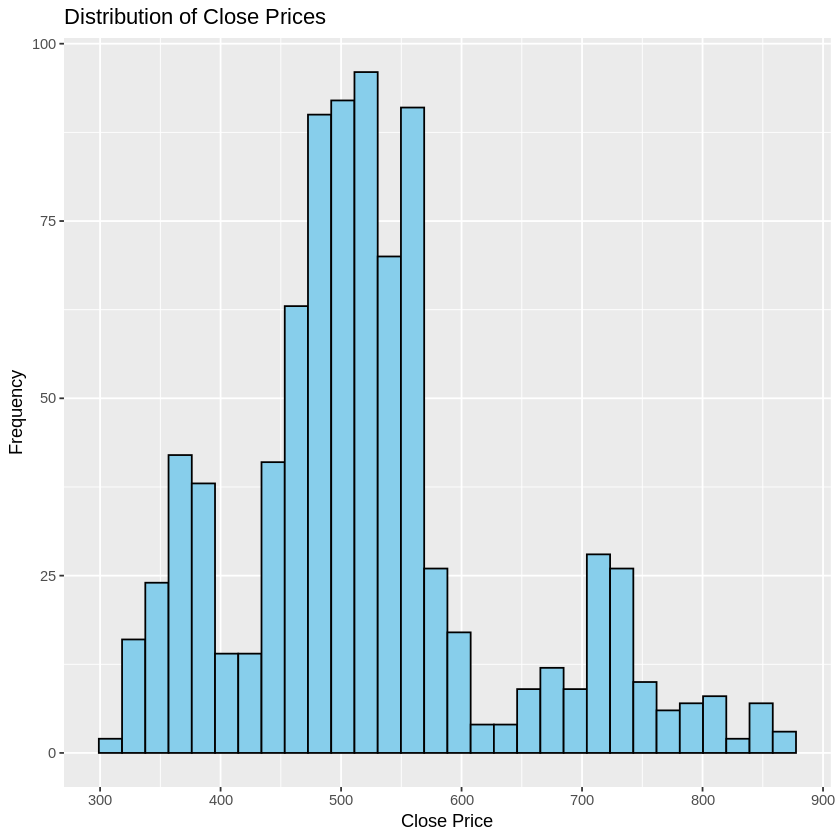

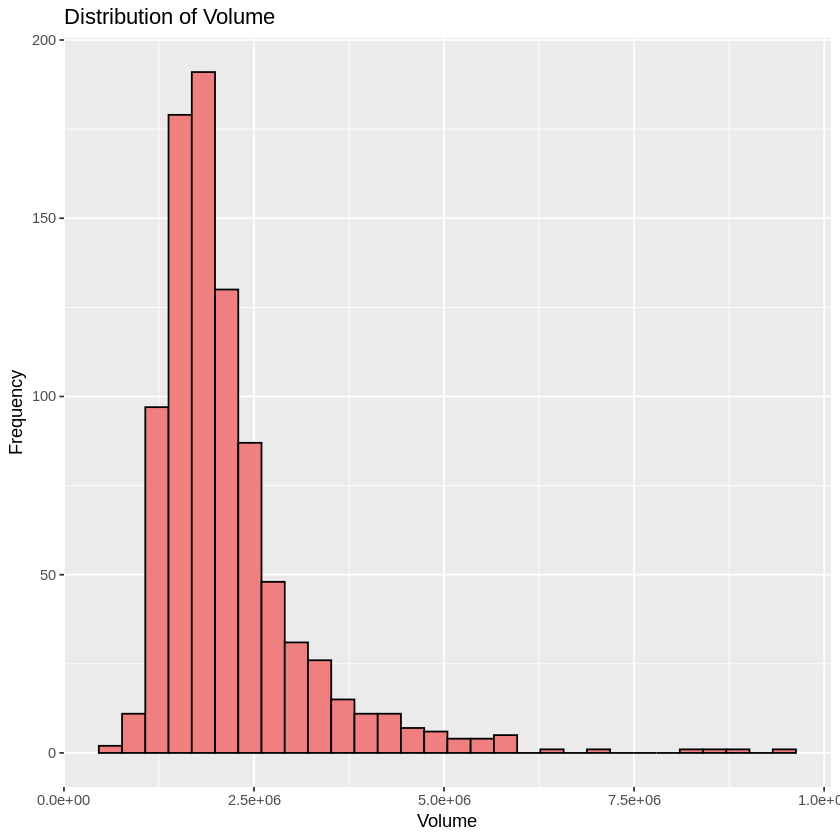

In [ ]:
# Histogram for 'close' column
ggplot(data, aes(x = close)) +
  geom_histogram(bins = 30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Close Prices", x = "Close Price", y = "Frequency")

# Histogram for 'volume'
ggplot(data, aes(x = volume)) +
  geom_histogram(bins = 30, fill = "lightcoral", color = "black") +
  labs(title = "Distribution of Volume", x = "Volume", y = "Frequency")


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


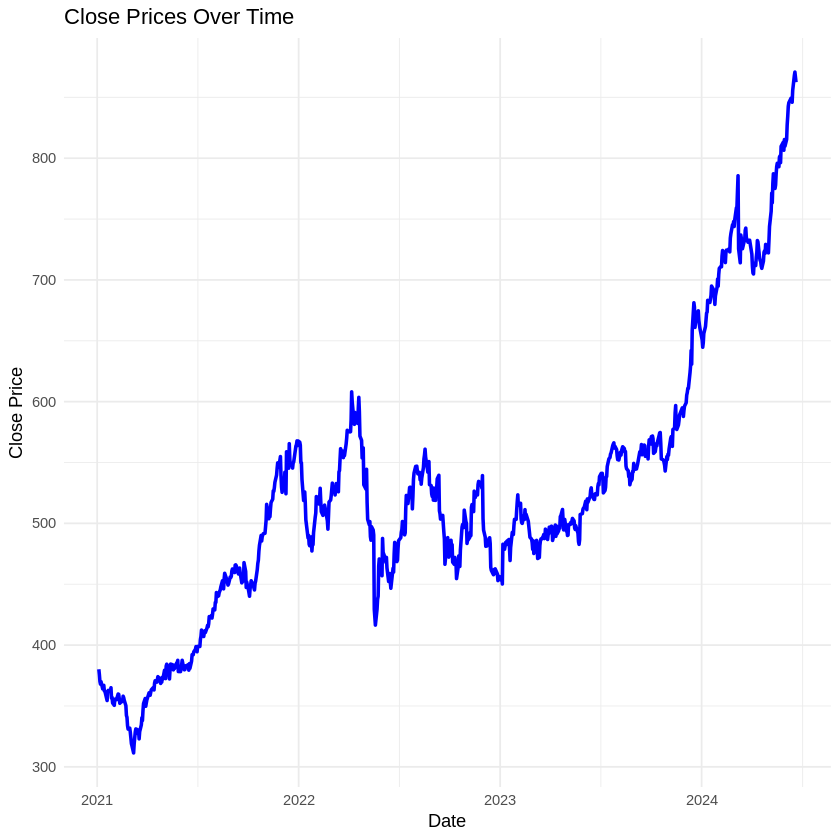

In [ ]:
# Line plot for Close Prices
ggplot(data, aes(x = Date, y = close)) +
  geom_line(color = "blue", size = 1) +
  labs(title = "Close Prices Over Time",
       x = "Date", y = "Close Price") +
  theme_minimal()


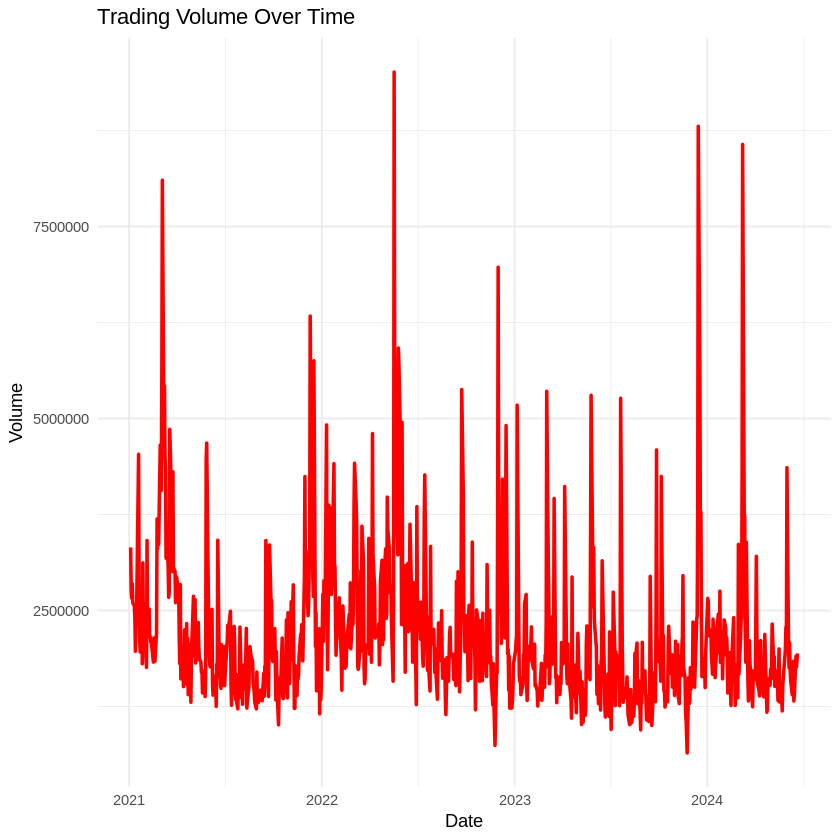

In [ ]:
# Line plot for Volume
ggplot(data, aes(x = Date, y = volume)) +
  geom_line(color = "red", size = 1) +
  labs(title = "Trading Volume Over Time",
       x = "Date", y = "Volume") +
  theme_minimal()


In [ ]:
colnames(data)

[1] "Date"     "open"     "high"     "low"      "close"    "adjclose" "volume"  
[8] "ticker"

In [ ]:
# Perform correlation matrix calculation
cor_matrix <- cor(data[, c("open", "high", "low", "close", "adjclose", "volume")])

# Print correlation matrix
print(cor_matrix)


               open       high        low      close   adjclose     volume
open      1.0000000  0.9992671  0.9992140  0.9983267  0.9977563 -0.1506565
high      0.9992671  1.0000000  0.9991305  0.9992676  0.9984570 -0.1395893
low       0.9992140  0.9991305  1.0000000  0.9993024  0.9988585 -0.1649118
close     0.9983267  0.9992676  0.9993024  1.0000000  0.9993390 -0.1523026
adjclose  0.9977563  0.9984570  0.9988585  0.9993390  1.0000000 -0.1518778
volume   -0.1506565 -0.1395893 -0.1649118 -0.1523026 -0.1518778  1.0000000


In [ ]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



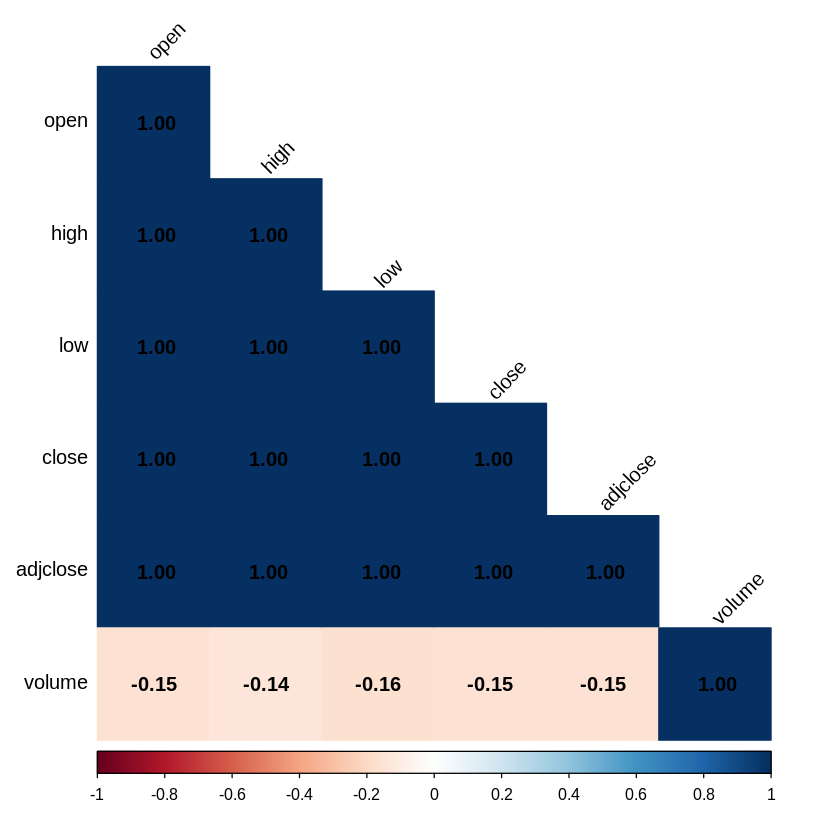

In [ ]:
library(corrplot)

# Plot the heatmap
corrplot(cor_matrix, method = "color", type = "lower",
         tl.col = "black", tl.srt = 45, addCoef.col = "black")


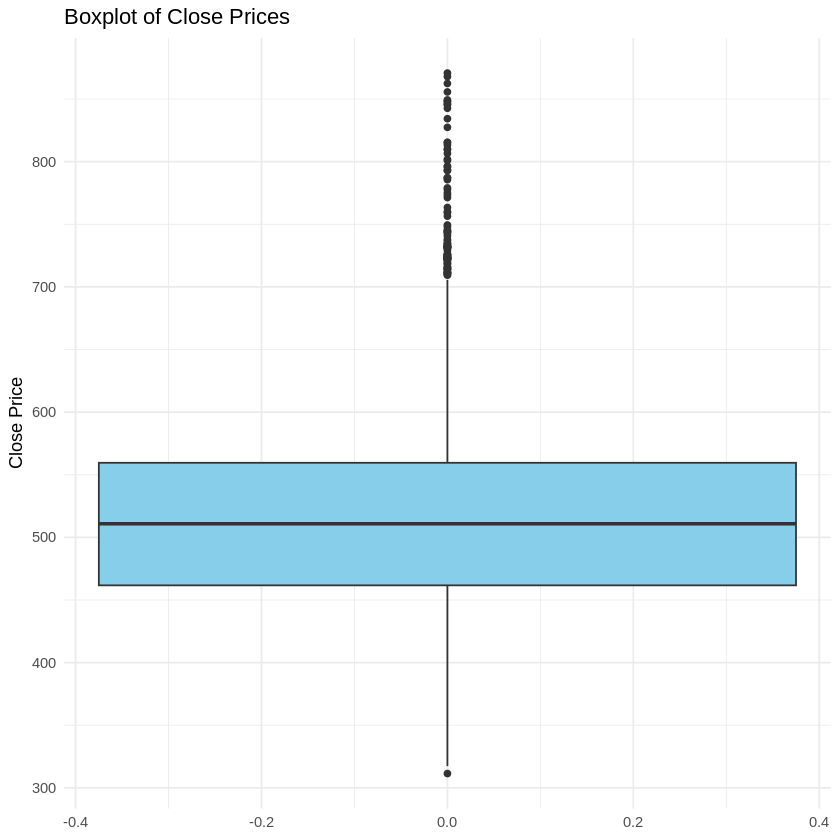

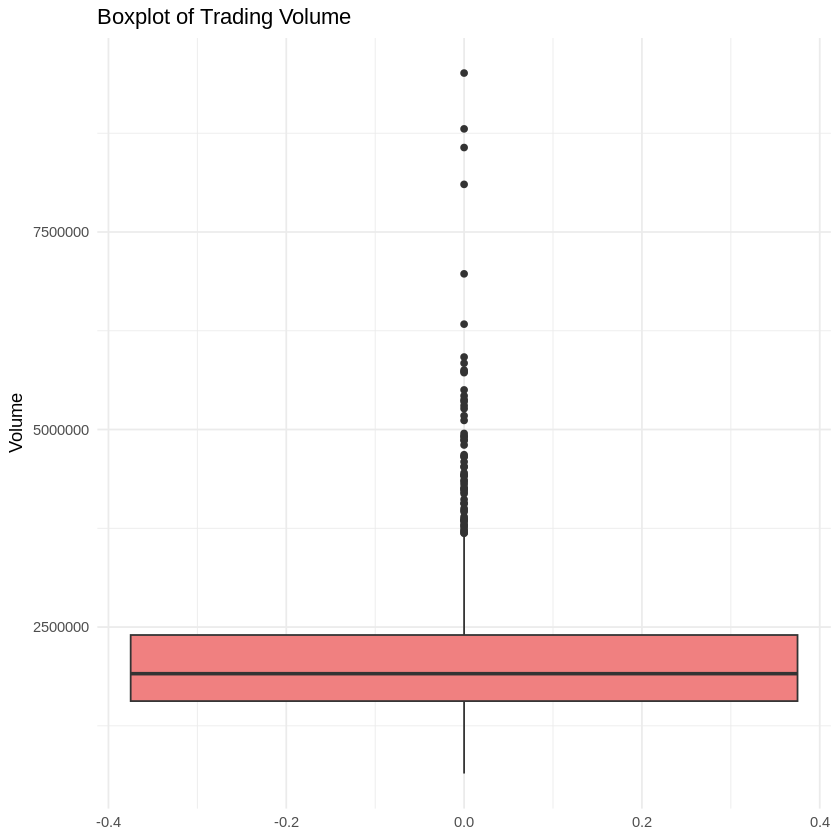

In [ ]:
# Boxplot for close prices
ggplot(data, aes(y = close)) +
  geom_boxplot(fill = "skyblue") +
  labs(title = "Boxplot of Close Prices", y = "Close Price") +
  theme_minimal()

# Boxplot for volume
ggplot(data, aes(y = volume)) +
  geom_boxplot(fill = "lightcoral") +
  labs(title = "Boxplot of Trading Volume", y = "Volume") +
  theme_minimal()


In [ ]:
# Define a function to detect outliers using IQR
detect_outliers <- function(column) {
  Q1 <- quantile(column, 0.25, na.rm = TRUE)
  Q3 <- quantile(column, 0.75, na.rm = TRUE)
  IQR_value <- Q3 - Q1

  lower_bound <- Q1 - 1.5 * IQR_value
  upper_bound <- Q3 + 1.5 * IQR_value

  outliers <- column[column < lower_bound | column > upper_bound]
  return(outliers)
}

# Detect outliers for 'close' and 'volume'
close_outliers <- detect_outliers(data$close)
volume_outliers <- detect_outliers(data$volume)

# Print results
print(paste("Number of Close Price Outliers:", length(close_outliers)))
print(paste("Number of Volume Outliers:", length(volume_outliers)))


[1] "Number of Close Price Outliers: 95"
[1] "Number of Volume Outliers: 61"


In [ ]:
# Log transformation
data$log_close <- log(data$close)


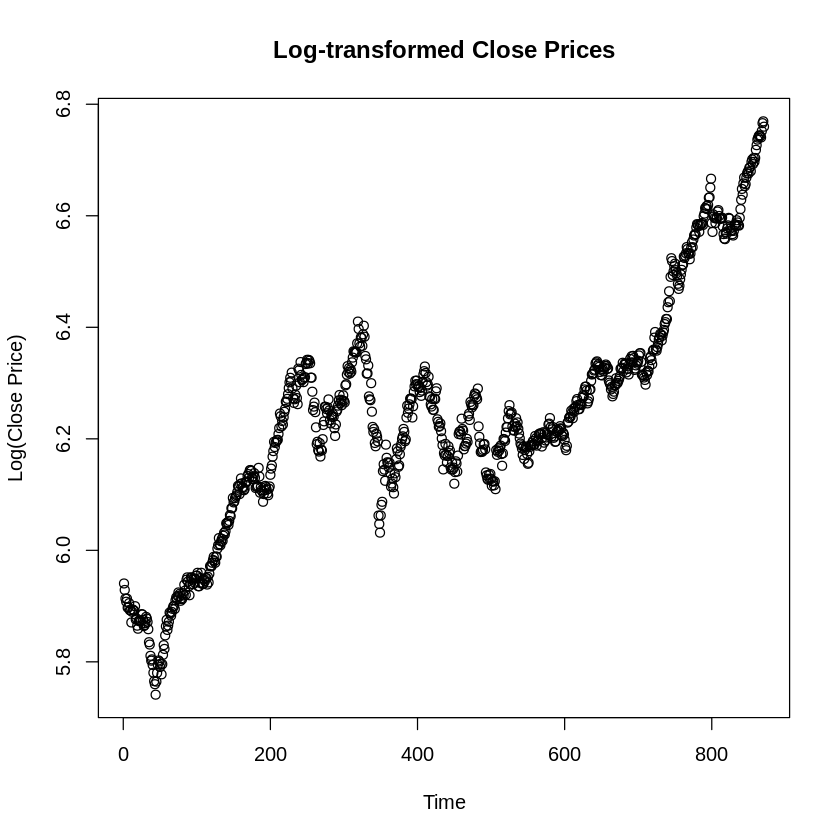

In [ ]:
# Plot the log-transformed close prices
plot(data$log_close, main = "Log-transformed Close Prices", xlab = "Time", ylab = "Log(Close Price)")


In [ ]:
# Convert the log-transformed close price to a time series object
ts_log_close <- ts(data$log_close, start = c(2021, 1), frequency = 12)

# Perform Augmented Dickey-Fuller (ADF) test
library(tseries)
adf_test <- adf.test(ts_log_close)

# Print the test result
print(adf_test)



	Augmented Dickey-Fuller Test

data:  ts_log_close
Dickey-Fuller = -1.8381, Lag order = 9, p-value = 0.6468
alternative hypothesis: stationary



In [ ]:
# Perform KPSS Test for level stationarity
kpss_test <- kpss.test(ts_log_close)

# Print the result
print(kpss_test)


Warning message in kpss.test(ts_log_close):
“p-value smaller than printed p-value”



	KPSS Test for Level Stationarity

data:  ts_log_close
KPSS Level = 8.5516, Truncation lag parameter = 6, p-value = 0.01



In [ ]:
# First differencing
ts_log_close_diff1 <- diff(ts_log_close, differences = 1)

# Check stationarity after 1st differencing
adf_test_diff1 <- adf.test(ts_log_close_diff1)
print(adf_test_diff1)


Warning message in adf.test(ts_log_close_diff1):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  ts_log_close_diff1
Dickey-Fuller = -8.594, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary



In [ ]:
# Perform KPSS Test for level stationarity after 1st differencing
kpss_test <- kpss.test(ts_log_close_diff1)

# Print the result
print(kpss_test)

Warning message in kpss.test(ts_log_close_diff1):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  ts_log_close_diff1
KPSS Level = 0.14814, Truncation lag parameter = 6, p-value = 0.1



##ACF and PACF

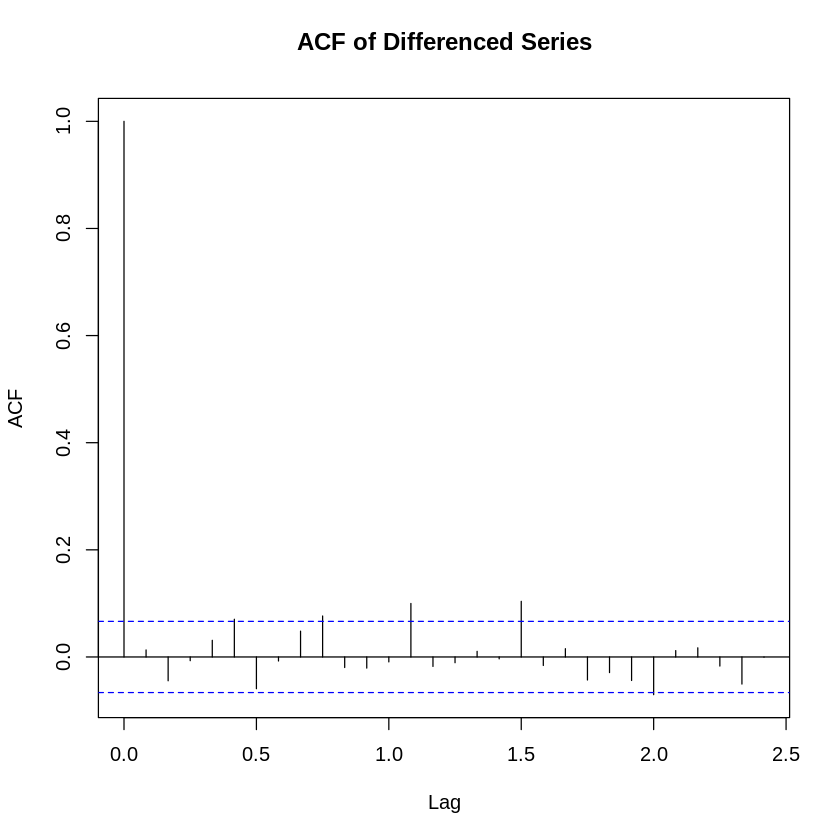

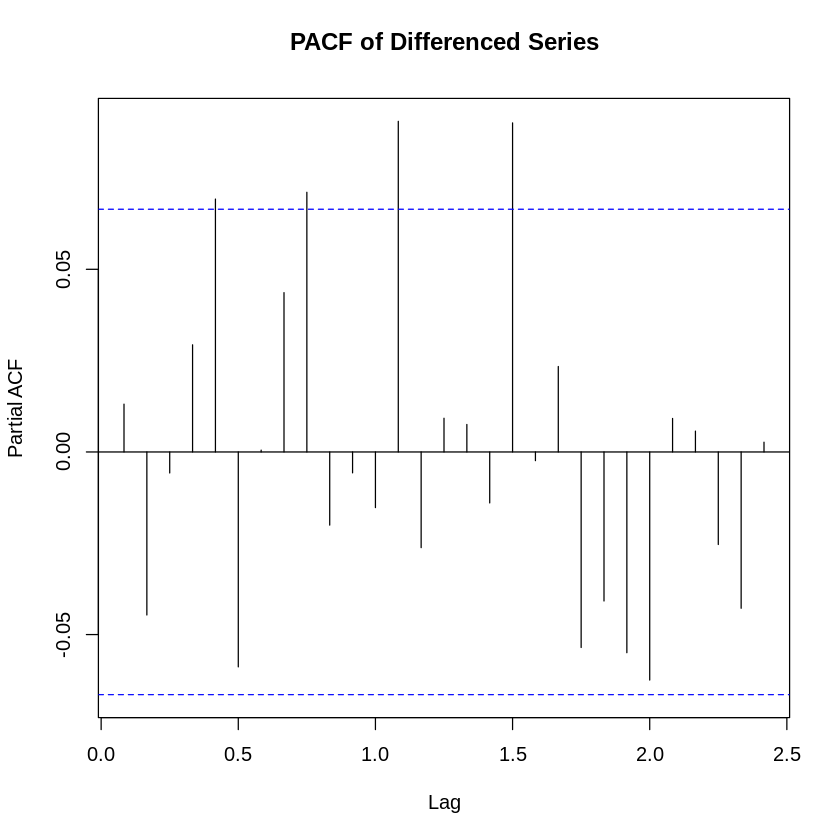

In [ ]:
# Load necessary library
library(forecast)

# ACF and PACF for the time series (log-transformed and differenced)

# ACF Plot
acf(ts_log_close_diff1, main = "ACF of Differenced Series")

# PACF Plot
pacf(ts_log_close_diff1, main = "PACF of Differenced Series")


##ARIMA

In [ ]:
# Load the forecast library
library(forecast)

# Fit ARIMA models with different parameters

arima_model_1 <- arima(ts_log_close_diff1, order = c(1, 1, 1))

arima_model_2 <- arima(ts_log_close_diff1, order = c(2, 1, 2))

arima_model_3 <- arima(ts_log_close_diff1, order = c(1, 1, 2))

arima_model_4 <- arima(ts_log_close_diff1, order = c(2, 1, 1))

# Lower AIC value indicates a better-fitting model
print("AIC values:")
print(AIC(arima_model_1))
print(AIC(arima_model_2))
print(AIC(arima_model_3))
print(AIC(arima_model_4))  #

# Lower BIC value indicates a better-fitting model
print("BIC values:")
print(BIC(arima_model_1))
print(BIC(arima_model_2))
print(BIC(arima_model_3))
print(BIC(arima_model_4))


[1] "AIC values:"
[1] -4852.981
[1] -4850.614
[1] -4853.976
[1] -4852.628
[1] "BIC values:"
[1] -4838.679
[1] -4826.778
[1] -4834.906
[1] -4833.558


In [ ]:
# Fit the best ARIMA model automatically using auto.arima with log-transformed data
auto_arima_model_log <- auto.arima(ts_log_close, d=1, seasonal=TRUE)

# Print the model summary
summary(auto_arima_model_log)
# Get AIC and BIC for the selected model
cat("AIC value: ", AIC(auto_arima_model_log), "\n")
cat("BIC value: ", BIC(auto_arima_model_log), "\n")

Series: ts_log_close 
ARIMA(0,1,0) with drift 

Coefficients:
      drift
      9e-04
s.e.  5e-04

sigma^2 = 0.0002168:  log likelihood = 2436.09
AIC=-4868.17   AICc=-4868.16   BIC=-4858.64

Training set error measures:
                       ME       RMSE       MAE           MPE      MAPE
Training set 6.819313e-06 0.01470572 0.0103025 -0.0004273264 0.1655466
                  MASE       ACF1
Training set 0.2443665 0.01268263

AIC value:  -4868.173 
BIC value:  -4858.636 


##SARIMA

In [ ]:
# Fit the SARIMA model with specified seasonal period (e.g., 12 for yearly seasonality)
auto_sarima_model <- auto.arima(ts_log_close, d = 1, seasonal = TRUE, stepwise = FALSE, approximation = FALSE)

# Print the model summary
summary(auto_sarima_model)

# Get AIC and BIC for the selected model
cat("AIC value: ", AIC(auto_sarima_model), "\n")
cat("BIC value: ", BIC(auto_sarima_model), "\n")


Series: ts_log_close 
ARIMA(2,1,2) with drift 

Coefficients:
         ar1      ar2      ma1     ma2  drift
      0.2155  -0.9040  -0.2034  0.8524  9e-04
s.e.  0.0872   0.0516   0.1080  0.0622  5e-04

sigma^2 = 0.0002145:  log likelihood = 2442.49
AIC=-4872.99   AICc=-4872.89   BIC=-4844.37

Training set error measures:
                       ME       RMSE        MAE          MPE      MAPE
Training set 4.015431e-05 0.01459697 0.01027135 9.757335e-05 0.1650238
                  MASE          ACF1
Training set 0.2436275 -0.0005336997

AIC value:  -4872.985 
BIC value:  -4844.374 


         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Aug 2093       6.760460 6.741689 6.779232 6.731752 6.789169
Sep 2093       6.763117 6.736410 6.789825 6.722272 6.803963
Oct 2093       6.764599 6.732348 6.796849 6.715276 6.813922
Nov 2093       6.764053 6.727276 6.800829 6.707808 6.820298
Dec 2093       6.764133 6.723001 6.805264 6.701227 6.827038
Jan 2094       6.766180 6.720895 6.811465 6.696923 6.835437
Feb 2094       6.768086 6.719212 6.816960 6.693339 6.842832
Mar 2094       6.768182 6.716171 6.820193 6.688638 6.847726
Apr 2094       6.768017 6.712924 6.823110 6.683760 6.852274
May 2094       6.769431 6.711223 6.827639 6.680410 6.858452
Jun 2094       6.771422 6.710321 6.832523 6.677976 6.864867
Jul 2094       6.772109 6.708420 6.835799 6.674704 6.869514


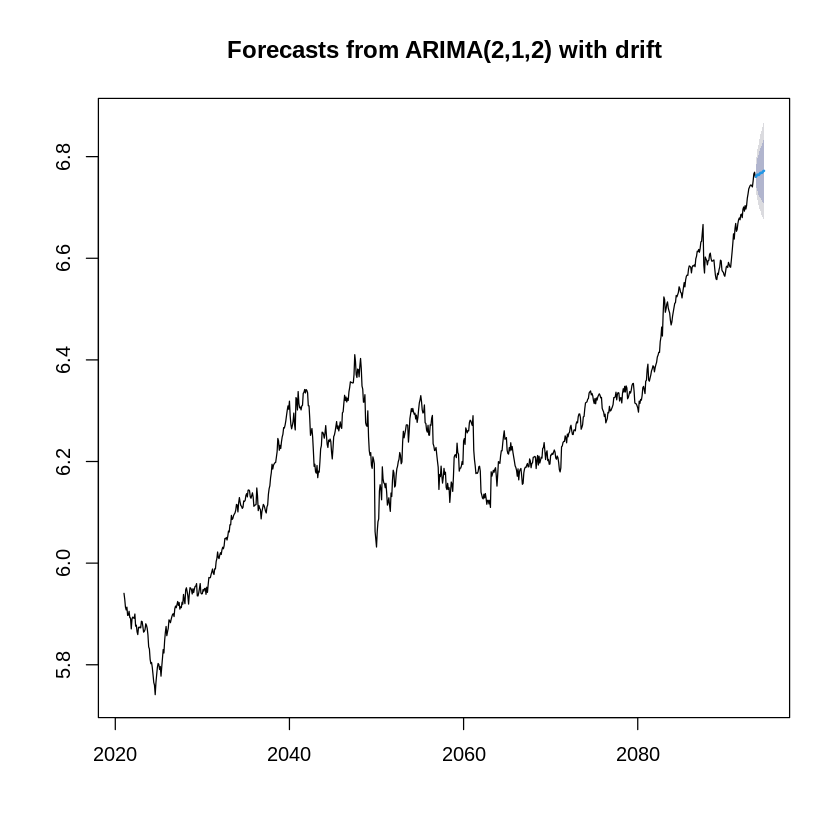

In [ ]:
# Forecast the next 12 periods (or adjust the horizon 'h' as per your requirement)
forecast_horizon <- 12  # Modify as needed

sarima_forecast <- forecast(auto_sarima_model, h = forecast_horizon)

# Plot the forecast
plot(sarima_forecast)

# Print the forecast values
print(sarima_forecast)


In [ ]:
# Rolling forecast
library(forecast)
train_size <- length(ts_log_close) - 10  # Use last 10 observations for validation
train_data <- ts_log_close[1:train_size]
test_data <- ts_log_close[(train_size + 1):length(ts_log_close)]

sarima_model <- auto.arima(train_data, seasonal = TRUE, d = 1)
sarima_forecast <- forecast(sarima_model, h = length(test_data))

# Now evaluate the forecasted values against test_data (holdout sample)
mae <- mean(abs(sarima_forecast$mean - test_data))
rmse <- sqrt(mean((sarima_forecast$mean - test_data)^2))
mape <- mean(abs((sarima_forecast$mean - test_data) / test_data)) * 100

cat("MAE:", mae, "\n")
cat("RMSE:", rmse, "\n")
cat("MAPE:", mape, "%", "\n")


MAE: 0.01888323 
RMSE: 0.02079675 
MAPE: 0.2795654 % 



	Box-Ljung test

data:  residuals
X-squared = 5.4744, df = 10, p-value = 0.8573



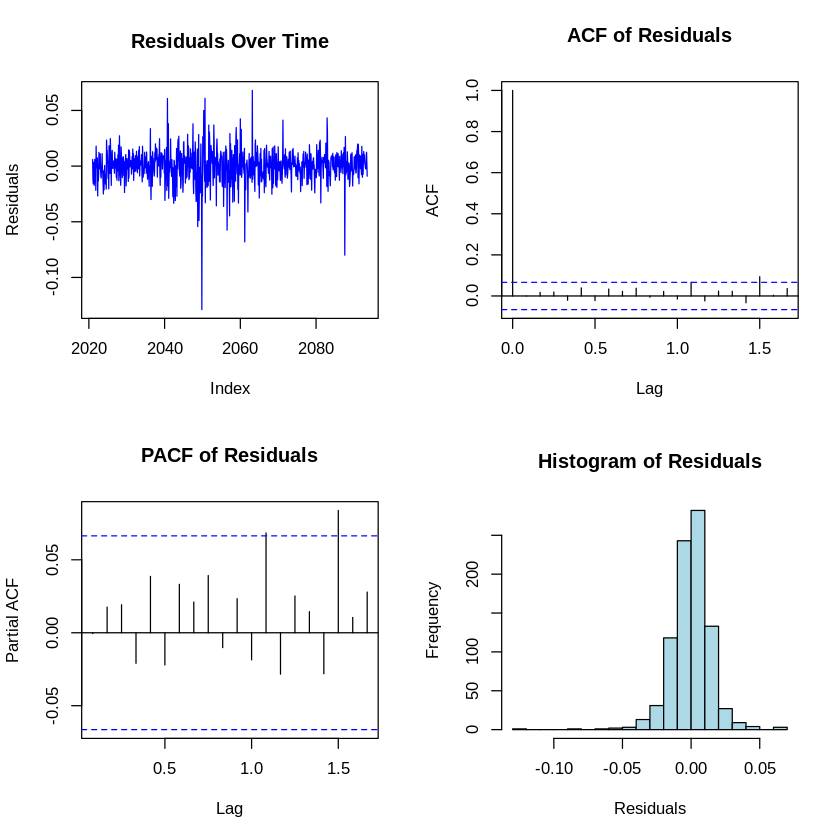

In [ ]:
# Extract residuals from the SARIMA model
residuals <- residuals(auto_sarima_model)

# Plot the residuals
par(mfrow = c(2, 2))  # Arrange plots in 2x2 grid

# 1. Time series plot of residuals
plot(residuals, main = "Residuals Over Time", ylab = "Residuals", xlab = "Index", col = "blue")

# 2. ACF plot to check for autocorrelation
acf(residuals, main = "ACF of Residuals", lag.max = 20)

# 3. PACF plot to check partial autocorrelation
pacf(residuals, main = "PACF of Residuals", lag.max = 20)

# 4. Histogram of residuals
hist(residuals, main = "Histogram of Residuals", xlab = "Residuals", col = "lightblue", breaks = 20)

# Ljung-Box test for white noise
library(stats)
ljung_box <- Box.test(residuals, lag = 10, type = "Ljung-Box")
print(ljung_box)
